# Etalumis SC 2019

In [1]:
edison_scaling_dir='/project/projectdirs/dasrepo/etalumis/SC19/data/scaling/edison_logs/'
cori_scaling_dir='/project/projectdirs/dasrepo/etalumis/SC19/data/scaling/cori_logs/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Edison Scaling

In [3]:
edisonlog_list=['train-log-12622746-1-64',
          'train-log-12618213-64-64',
          'train-log-12618375-128-64',
          'train-log-12618433-256-64',
          'train-log-12620969-512-64',
          'train-log-12655512-1024-64']

In [4]:
dfedison_list=[]
for log in edisonlog_list:
    dfedison_list.append(pd.read_csv(edison_scaling_dir+log))

In [5]:
def moving_average(data, wsize):
    if(len(data)<wsize):
        return data.mean()
    else:
        steps=len(data)-wsize
        ma=[]
        for i in range(steps):
            ma.append(data[i:wsize+i].mean())
        return ma

In [6]:
edison_mean=[]
edison_std=[]
edison_scaling=[]
edison_nodes=[]
edison_ideal=[]
edison_ideal_std=[]
edison_peak=[]
edison_10iter_avg=[]
edison_10iter_std=[]
edison_ma=[]
edison_scaling2=[]
for idx,de in enumerate(dfedison_list):
    edison_mean.append(de[' traces_per_second'][1:].mean())
    edison_ma.append(moving_average(de[' traces_per_second'][1:], 10))
    edison_std.append(de[' traces_per_second'][1:].std())
    edison_peak.append(de[' traces_per_second'][1:].max())
    temp= np.asarray(de[' traces_per_second'][1:])
    
    edison_10iter_avg.append(temp[temp.argsort()[-10:]].mean())
    edison_10iter_std.append(temp[temp.argsort()[-10:]].std())
    if (idx==0):
        edison_scaling.append(1)
        edison_nodes.append(1)
        edison_ideal.append(np.mean(edison_ma[0]))
        edison_ideal_std.append(np.std(edison_ma[0]))
        edison_scaling2.append(1)
    else:
        edison_scaling.append(np.mean(edison_ma[-1])/np.mean(edison_ma[0])/np.power(2,5+idx))
        edison_nodes.append(np.power(2,5+idx))
        edison_ideal.append(np.mean(edison_ma[0])*np.power(2,5+idx))
        edison_ideal_std.append(np.std(edison_ma[0])*np.power(2,5+idx))
        edison_scaling2.append(edison_mean[-1]/edison_mean[0]/np.power(2,5+idx))

In [7]:
edison_ideal_std

[0.62412403476241141,
 39.94393822479433,
 79.88787644958866,
 159.77575289917732,
 319.55150579835464,
 639.10301159670928]

In [8]:
edison_ma_max=[]
edison_ma_mean=[]
edison_ma_std=[]
for x in edison_ma:
    edison_ma_max.append(np.max(x))
    edison_ma_mean.append(np.mean(x))
    edison_ma_std.append(np.std(x))
    print ('best:%.2f, mean:%.2f, std:%.2f'%(np.max(x),np.mean(x), np.std(x)))

best:28.00, mean:26.84, std:0.62
best:1479.92, mean:1415.65, std:46.65
best:2890.83, mean:2807.21, std:49.95
best:5873.26, mean:5513.15, std:159.56
best:11650.51, mean:10886.75, std:309.32
best:23053.91, mean:21693.43, std:733.39


In [9]:
edison_peak, edison_ideal

([29.405100344248371,
  1784.810861747633,
  3601.947998628817,
  6861.7816010689367,
  13495.696002026729,
  28430.453556895263],
 [26.843991266393505,
  1718.0154410491843,
  3436.0308820983687,
  6872.0617641967374,
  13744.123528393475,
  27488.24705678695])

In [10]:
edison_peak[-1]-edison_ideal[-1]

942.20650010831378

In [11]:
edison_peak[-1]

28430.453556895263

In [12]:
np.array(edison_nodes)

array([   1,   64,  128,  256,  512, 1024])

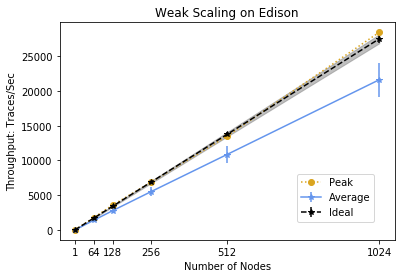

In [13]:
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Throughput: Traces/Sec')
ax1.errorbar(edison_nodes, edison_mean, yerr=edison_std,fmt='-*', ecolor='cornflowerblue', capthick=5,color='cornflowerblue', label='Average')
ax1.errorbar(edison_nodes, edison_ideal,yerr=edison_ideal_std, linestyle='--',fmt='-*',color='black',label='Ideal')
#ax1.plot(edison_nodes, np.array(edison_ideal) - np.array(edison_ideal_std),linestyle='--',color='black',label='Ideal')
#ax1.plot(edison_nodes, np.array(edison_ideal) + np.array(edison_ideal_std),linestyle='--',color='black')
plt.fill_between(np.array(edison_nodes), np.array(edison_ideal) - np.array(edison_ideal_std), np.array(edison_ideal) + np.array(edison_ideal_std), color='gray', alpha=0.5)
#ax1.plot(edison_nodes, edison_ma_mean,linestyle=':',marker='o',color='cyan',label='MA_Mean')
ax1.plot(edison_nodes, edison_peak,linestyle=':',marker='o',color='goldenrod',label='Peak')
ax1.set_xticks(edison_nodes)

ax1.set_title('Weak Scaling on Edison')
fig.legend(loc=1, bbox_to_anchor=(0.878,0.38))
fig.savefig('scaling_edison_2019_idealerr.pdf')
#print ('Best 10 Iterations Average:',np.round(edison_10iter_avg,2))

## Cori Scaling

In [14]:
#https://docs.google.com/spreadsheets/d/1wMInU0OV6IwK0Z020_4s8C2t8Wzhe4k2j3UTNMa3np8/edit#gid=0

In [15]:
corilog_list=[
          'train_loss_log_15Mdata_BZPT-64-Nodes-1-LR-10_scaling-20069909',     # jialin's run
          'train_loss_log_15Mdata_BZPT-64-Nodes-64-LR-10_scaling-19985650',    # jialin's run
          'train_loss_log_15Mdata_BZPT-64-Nodes-128-LR-10_scaling-19939809',   # jialin's run
          'train_loss_log_15Mdata_BZPT-64-Nodes-256-LR-10_scaling-20039395',   # jialin's run
          'train_loss_log_15Mdata_BZPT-64-Nodes-512-LR-10_scaling-19969337',   # jialin's run
          #'train_loss_log_15Mdata_BZPT-64-Nodes-1024-LR-10_scaling-19969341'] # jialin's run
          'train_loss_log_15Mdata_BZPT-64-Nodes-1024-LR-10_scaling-19931889'] # reservation run

In [16]:
dfcori_list=[]
for log in corilog_list:
    dfcori_list.append(pd.read_csv(cori_scaling_dir+log))

In [17]:
cori_mean=[]
cori_std=[]
cori_scaling=[]
cori_nodes=[]
cori_ideal=[]
cori_ideal_std=[]
cori_peak=[]
cori_10iter_avg=[]
cori_10iter_std=[]
cori_ma=[]
cori_scaling2=[]
for idx,de in enumerate(dfcori_list):
    cori_mean.append(de[' traces_per_second'][1:].mean())
    cori_ma.append(moving_average(de[' traces_per_second'][1:], 10))
    cori_std.append(de[' traces_per_second'][1:].std())
    cori_peak.append(de[' traces_per_second'][1:].max())
    temp= np.asarray(de[' traces_per_second'][1:])
    cori_10iter_avg.append(temp[temp.argsort()[-10:]].mean())
    cori_10iter_std.append(temp[temp.argsort()[-10:]].std())

    if (idx==0):
        cori_scaling.append(1)
        cori_nodes.append(1)
        cori_ideal.append(np.mean(cori_ma[0]))
        cori_ideal_std.append(np.std(cori_ma[0]))
        cori_scaling2.append(1)
    else:
        cori_scaling.append(np.mean(cori_ma[-1])/np.mean(cori_ma[0])/np.power(2,5+idx))
        cori_scaling2.append((cori_mean[-1])/(cori_mean[0])/np.power(2,5+idx))
        cori_nodes.append(np.power(2,5+idx))
        cori_ideal.append(np.mean(cori_ma[0])*np.power(2,5+idx))
        cori_ideal_std.append(np.std(cori_ma[0])*np.power(2,5+idx))

In [18]:
cori_ma_max=[]
cori_ma_mean=[]
cori_ma_std=[]
for x in cori_ma:
    cori_ma_max.append(np.max(x))
    cori_ma_mean.append(np.mean(x))
    cori_ma_std.append(np.std(x))
    print ('best:%.2f, mean:%.2f,std:%.2f'%(np.max(x),np.mean(x),np.std(x)))

best:64.95, mean:59.97,std:1.61
best:2927.44, mean:2202.82,std:243.38
best:5992.85, mean:5264.68,std:456.47
best:10797.43, mean:7070.99,std:1727.11
best:18103.93, mean:14579.42,std:1060.22
best:32175.93, mean:30471.45,std:1817.22


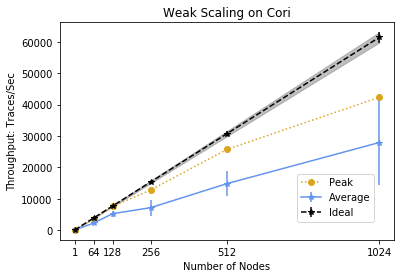

In [19]:
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Throughput: Traces/Sec')
ax1.errorbar(cori_nodes, cori_mean, yerr=cori_std,fmt='-*', capthick=5,color='cornflowerblue', label='Average')
ax1.errorbar(cori_nodes, cori_ideal,yerr=cori_ideal_std, linestyle='--',fmt='-*',color='black',label='Ideal')
#ax1.plot(cori_nodes, np.array(cori_ideal) - np.array(cori_ideal_std),linestyle='--',color='black',label='Ideal')
#ax1.plot(cori_nodes, np.array(cori_ideal) + np.array(cori_ideal_std),linestyle='--',color='black')
plt.fill_between(np.array(cori_nodes), np.array(cori_ideal) - np.array(cori_ideal_std), np.array(cori_ideal) + np.array(cori_ideal_std), color='gray', alpha=0.5)
#ax1.plot(cori_nodes, cori_ma_mean,linestyle=':',marker='o',color='cyan',label='MA_Mean')
ax1.plot(cori_nodes, cori_peak,linestyle=':',marker='o',color='goldenrod',label='Peak')
#ax1.plot(cori_nodes, cori_peak,linestyle=':',marker='o',color='cyan',label='Peak')
ax1.set_xticks(cori_nodes)
#fig.tight_layout()
#ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Weak Scaling on Cori')
fig.legend(loc=1, bbox_to_anchor=(0.878,0.38))
fig.savefig('scaling_cori_2019_idealerr.pdf')

## Cori/Edison Peak

In [20]:
df=pd.DataFrame([edison_peak,cori_peak],columns=edison_nodes,index=['Edison','Cori'])

In [21]:
df.round(2)

1        64       128       256       512       1024
Edison  29.41  1784.81  3601.95   6861.78  13495.70  28430.45
Cori    73.48  3488.45  7545.99  12772.02  25699.65  42291.67

## Cori/Edison Scaling Efficiency based on Moving Average

In [22]:
df_scale=pd.DataFrame([edison_scaling,cori_scaling],columns=edison_nodes,index=['Edison','Cori'])
df_scale.round(2)

1     64    128   256   512   1024
Edison     1  0.82  0.82  0.80  0.79  0.79
Cori       1  0.57  0.69  0.46  0.47  0.50

In [23]:
df_scale2=pd.DataFrame([edison_scaling2,cori_scaling2],columns=edison_nodes,index=['Edison','Cori'])
df_scale2.round(2)

1     64    128   256   512   1024
Edison     1  0.82  0.82  0.80  0.79  0.79
Cori       1  0.57  0.68  0.47  0.48  0.45

In [24]:
edison_ma_mean

[26.843991266393505,
 1415.6510107888851,
 2807.2097275336123,
 5513.1522909917785,
 10886.752891666818,
 21693.431596917882]

In [25]:
cori_ma_mean

[59.970573380041486,
 2202.8151422568944,
 5264.6844724019957,
 7070.9879654137039,
 14579.423887575209,
 30471.445598204333]

In [26]:
edison_mean

[26.752324969838813,
 1405.8592677033926,
 2793.9250927911476,
 5505.668449209967,
 10856.927356400114,
 21606.668544622516]

In [27]:
cori_mean

[59.92973198650772,
 2205.31981936756,
 5231.555427189584,
 7142.730153330926,
 14790.595648397464,
 27895.81288124105]

In [28]:
cori_ma_max

[64.947028542435504,
 2927.4435788663104,
 5992.8481051584877,
 10797.432875395065,
 18103.925483690578,
 32175.931612265565]

In [29]:
edison_ma_max

[27.995872076208776,
 1479.917704750964,
 2890.8257855834445,
 5873.2554528922656,
 11650.50992392795,
 23053.9131453675]

In [30]:
edison_peak

[29.405100344248371,
 1784.810861747633,
 3601.947998628817,
 6861.7816010689367,
 13495.696002026729,
 28430.453556895263]

In [31]:
cori_peak


[73.484709725829291,
 3488.4548492429808,
 7545.9943758195168,
 12772.021168410938,
 25699.647753203721,
 42291.66747861707]